# Classification of MNIST images

In [199]:
#importing data from the list of datasets available under sklearn

from sklearn.datasets import fetch_mldata
mnist = fetch_mldata('MNIST original')
mnist


{'COL_NAMES': ['label', 'data'],
 'DESCR': 'mldata.org dataset: mnist-original',
 'data': array([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ..., 
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]], dtype=uint8),
 'target': array([ 0.,  0.,  0., ...,  9.,  9.,  9.])}

In [200]:
X, y = mnist['data'], mnist['target']

In [201]:
#size of data set. 70000 rows and 784 instances
X.shape

(70000, 784)

In [202]:
y.shape

(70000,)

In [203]:

%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt


#randomly picking any array to display the image
some_digit  = X[36000]

#each image is 28*28 pixels
some_digit_image = some_digit.reshape(28,28)


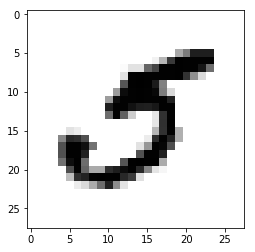

In [204]:
#displays the image
plt.imshow(some_digit_image, cmap = matplotlib.cm.binary, interpolation ='nearest')

In [205]:
#validating the value at the same index
y[36000]

5.0

In [206]:
#Extra
def plot_digits(instances, images_per_row=10, **options):
    size = 28
    images_per_row = min(len(instances), images_per_row)
    images = [instance.reshape(size,size) for instance in instances]
    n_rows = (len(instances) - 1) // images_per_row + 1
    row_images = []
    n_empty = n_rows * images_per_row - len(instances)
    images.append(np.zeros((size, size * n_empty)))
    for row in range(n_rows):
        rimages = images[row * images_per_row : (row + 1) * images_per_row]
        row_images.append(np.concatenate(rimages, axis=1))
    image = np.concatenate(row_images, axis=0)
    plt.imshow(image, cmap = matplotlib.cm.binary, **options)
    plt.axis("off")


In [207]:
#dividing the dataset into training and testing
X_train, X_test, y_train, y_test = X[:60000], X[60000:],y[:60000],y[60000:]

In [208]:
#shuffling the dataset to ensure all cross-validation folds will be similar
import numpy as np
shuffle_index = np.random.permutation(60000)
X_train, y_train = X_train[shuffle_index], y_train[shuffle_index]

In [209]:
# 5 detector (Training to identify only one digit)

#True for all 5s, False for all other digits
y_train_5 = (y_train == 5) 
y_test_5 = (y_test == 5)

In [210]:
#working with stochastic gradient classifier (can work on large datasets, suits well for online learning)
from sklearn.linear_model import SGDClassifier

sgd_clf  = SGDClassifier(random_state=42)
sgd_clf.fit(X_train,y_train_5)

C:\Users\trupt\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


SGDClassifier(alpha=0.0001, average=False, class_weight=None, epsilon=0.1,
       eta0=0.0, fit_intercept=True, l1_ratio=0.15,
       learning_rate='optimal', loss='hinge', max_iter=None, n_iter=None,
       n_jobs=1, penalty='l2', power_t=0.5, random_state=42, shuffle=True,
       tol=None, verbose=0, warm_start=False)

In [211]:
#predicting the digit at same index as earlier, to verify the correctness of the model
sgd_clf.predict([some_digit])


array([ True], dtype=bool)

# Implementing Cross Validation

In [212]:
#implemnets stratified sampling to contain a representative ratio of each class. 
# A clone of classifier is created which is trained using the train folds and makes prediction on test fold

from sklearn.model_selection import StratifiedKFold
from sklearn.base import clone

skfolds = StratifiedKFold(n_splits = 3, random_state=42)


for train_index, test_index in skfolds.split(X_train,y_train_5):
    clone_clf = clone(sgd_clf)
    X_train_folds = X_train[train_index]
    y_train_folds = (y_train_5[train_index])
    X_test_fold = X_train[test_index]
    y_test_fold = (y_train_5[test_index])
    
    #counts the no. of correct predictions and outputs that
    clone_clf.fit(X_train_folds, y_train_folds)
    y_pred = clone_clf.predict(X_test_fold)
    n_correct = sum(y_pred == y_test_fold)
    print(n_correct / len(y_pred))

C:\Users\trupt\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


0.96195


C:\Users\trupt\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


0.9594


C:\Users\trupt\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


0.95405


In [213]:
#evaluating SGD classifier using K-fold cross validation with three folds
from sklearn.model_selection import cross_val_score
cross_val_score(sgd_clf, X_train,y_train,cv=3,scoring='accuracy')

C:\Users\trupt\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)
C:\Users\trupt\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)
C:\Users\trupt\Anaconda3\lib\sit

array([ 0.8634773 ,  0.86544327,  0.85212782])

In [ ]:
The accuracy here is around 86% which is pretty good. But now lets classify the not-5 class

In [143]:
from sklearn.base import BaseEstimator

class Never5Classifier(BaseEstimator):
    def fit(self, X, y=None):
        pass
    def predict(self, X):
        return np.zeros((len(X),1),dtype=bool)
    
    

In [144]:
#identifying the model accuracy
never_5_clf = Never5Classifier()
cross_val_score(never_5_clf,X_train,y_train_5,cv=3,scoring='accuracy')

array([ 0.90935,  0.91225,  0.90735])

In [ ]:
#shows 90% accuracy. because 10% images are 5 

In [145]:
#Confusion Matrix... to evaluate the performance of the classifier

from sklearn.model_selection import cross_val_predict
#cross_val_predict performs K-fold cross validation and returns the prediction made on each test fold.  
y_train_pred = cross_val_predict(sgd_clf,X_train,y_train_5,cv=3)

C:\Users\trupt\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)
C:\Users\trupt\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)
C:\Users\trupt\Anaconda3\lib\sit

In [146]:
#outputs the confusion matrix
from sklearn.metrics import confusion_matrix
confusion_matrix(y_train_5,y_train_pred)

array([[52937,  1642],
       [  854,  4567]], dtype=int64)

In [147]:
y_train_perfect_predictions = y_train_5
confusion_matrix(y_train_5,y_train_perfect_predictions)

array([[54579,     0],
       [    0,  5421]], dtype=int64)

In [148]:
from sklearn.metrics import precision_score, recall_score

precision_score(y_train_5,y_train_pred)

0.73554517635690131

In [149]:
precision_s = 3480 /(3480 + 588)
precision_s

0.855457227138643

In [150]:
recall_score(y_train_5,y_train_pred)

0.84246448994650436

In [151]:
recall_s = 3480/ (3480 + 1941)
recall_s

0.6419479800774764

In [152]:
#Computing F1 score

from sklearn.metrics import f1_score
f1_score(y_train_5,y_train_pred)

0.78538263112639728

In [153]:
f1_score = 4606 / (4606 + (815 + 2138)/2)
f1_score

0.7572544184134813

Precision Recall TradeOff

In [154]:
y_scores  = sgd_clf.decision_function([some_digit])
y_scores

array([ 127032.15639167])

In [155]:
threshold = 0
y_some_digit_pred = (y_scores > threshold)

In [156]:
y_some_digit_pred

array([ True], dtype=bool)

In [157]:
threshold = 200000

In [158]:
y_some_digit_pred = (y_scores > threshold)
y_some_digit_pred

array([False], dtype=bool)

In [159]:
#deciding the threshold
y_scores = cross_val_predict(sgd_clf,X_train,y_train_5, cv=3, method = 'decision_function')

C:\Users\trupt\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)
C:\Users\trupt\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)
C:\Users\trupt\Anaconda3\lib\sit

In [160]:
y_scores.shape

(60000,)

In [161]:
#compute Precision and Recall for all thresholds
from sklearn.metrics import precision_recall_curve
precisions, recalls, thresholds = precision_recall_curve(y_train_5,y_scores)

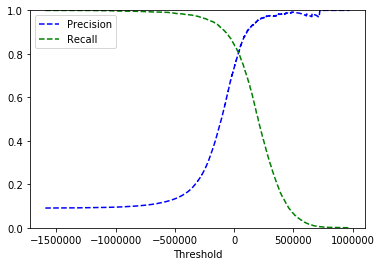

In [162]:
#Plotting precison recall curve

def plot_precison_recall_vs_threshold(precisions,recalls,thresholds):
    plt.plot(thresholds,precisions[:-1], "b--",label = "Precision")
    plt.plot(thresholds, recalls[:-1],"g--",label='Recall')
    plt.xlabel('Threshold')
    plt.legend(loc='upper left')
    plt.ylim([0,1])
    
plot_precison_recall_vs_threshold(precisions,recalls,thresholds)
plt.show()

In [163]:
y_train_pred_90 = (y_scores > 170000)

In [164]:
precision_score(y_train_5,y_train_pred_90)

0.93876932403758717

In [165]:
recall_score(y_train_5,y_train_pred_90)

0.5712968087068806

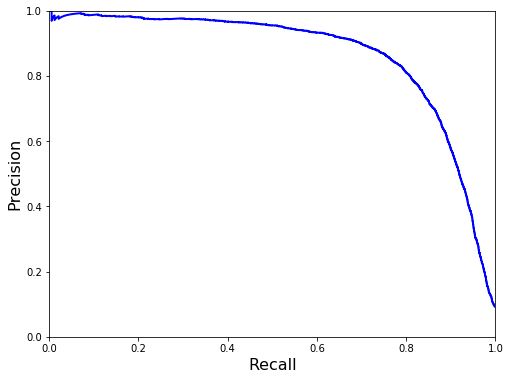

In [166]:
def plot_precision_vs_recall(precisions, recalls):
    plt.plot(recalls, precisions, "b-", linewidth=2)
    plt.xlabel("Recall", fontsize=16)
    plt.ylabel("Precision", fontsize=16)
    plt.axis([0, 1, 0, 1])

plt.figure(figsize=(8, 6))
plot_precision_vs_recall(precisions, recalls)
plt.show()

ROC Curve

In [167]:
from sklearn.metrics import roc_curve
fpr,tpr, thresholds = roc_curve(y_train_5, y_scores)

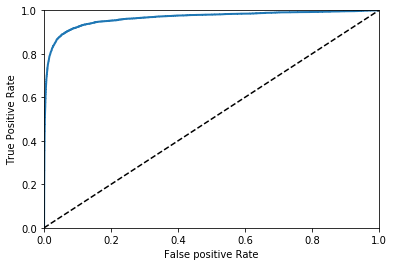

In [168]:
#Plotting ROC curve

def plot_roc_curve(fpr,tpr, label=None):
    plt.plot(fpr, tpr, linewidth =2, label=label)
    plt.plot([0,1],[0,1],'k--')
    plt.axis([0,1,0,1])
    plt.xlabel('False positive Rate')
    plt.ylabel('True Positive Rate')
    

plot_roc_curve(fpr,tpr)
plt.show()



In [169]:
#Computing AUC
from sklearn.metrics import roc_auc_score
roc_auc_score(y_train_5,y_scores)

0.96515228696670918

In [170]:
#Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier

forest_clf = RandomForestClassifier(random_state = 42)
y_probas_forest = cross_val_predict(forest_clf, X_train,y_train_5, cv=3,method='predict_proba')

In [171]:
y_scores_forest = y_probas_forest[:,1]
fpr_forest, tpr_forest, thresholds_forest = roc_curve(y_train_5,y_scores_forest)

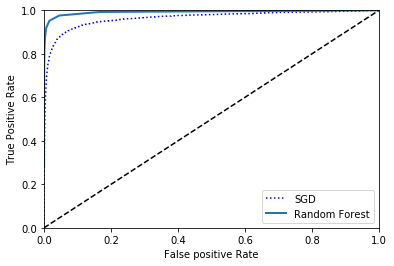

In [172]:
plt.plot(fpr,tpr,'b:', label='SGD')
plot_roc_curve(fpr_forest,tpr_forest,label='Random Forest')
plt.legend(loc='lower right')
plt.show()

In [173]:
roc_auc_score(y_train_5,y_scores_forest)

0.99244700827628396

In [174]:
y_train_pred_forest = cross_val_predict(forest_clf,X_train,y_train_5,cv=3)
precision_score(y_train_5,y_train_pred_forest)




0.9875083649341958

In [175]:
recall_score(y_train_5,y_train_pred_forest)

0.81663899649511162


MULTICLASS CLASSIFICATION

In [176]:
sgd_clf.fit(X_train,y_train)
sgd_clf.predict([some_digit])

C:\Users\trupt\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


array([ 5.])

In [177]:
some_digit_scores = sgd_clf.decision_function([some_digit])
some_digit_scores

array([[ -94932.17114765, -457223.86826105, -165140.65991826,
        -170049.36730252, -341193.99471406,  127032.15639167,
        -909649.36705123, -411918.07707687, -850724.02222817,
        -445733.9809628 ]])

In [178]:
np.argmax(some_digit_scores)

5

In [179]:
sgd_clf.classes_

array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9.])

In [180]:
sgd_clf.classes_[5]

5.0

In [181]:
from sklearn.multiclass import OneVsOneClassifier
ovo_clf = OneVsOneClassifier(SGDClassifier(max_iter=5,random_state=42))
ovo_clf.fit(X_train,y_train)
ovo_clf.predict([some_digit])

array([ 5.])

In [182]:
len(ovo_clf.estimators_)

45

In [183]:
#Training RandomForestClassifier

forest_clf.fit(X_train,y_train)
forest_clf.predict([some_digit])

array([ 5.])

In [184]:
forest_clf.predict_proba([some_digit])


array([[ 0.2,  0. ,  0. ,  0. ,  0. ,  0.8,  0. ,  0. ,  0. ,  0. ]])

In [185]:
#SGD Classifier accuracy using CV
cross_val_score(sgd_clf,X_train,y_train,cv=3,scoring='accuracy')


C:\Users\trupt\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)
C:\Users\trupt\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)
C:\Users\trupt\Anaconda3\lib\sit

array([ 0.85027994,  0.85519276,  0.84192629])

In [186]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_Scaled = scaler.fit_transform(X_train.astype(np.float64))
cross_val_score(sgd_clf,X_train_Scaled,y_train,cv=3,scoring='accuracy')

C:\Users\trupt\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)
C:\Users\trupt\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)
C:\Users\trupt\Anaconda3\lib\sit

array([ 0.91176765,  0.90639532,  0.90878632])

In [187]:
#Error Analysis

In [188]:
#Confusion Matrix
y_train_pred = cross_val_predict(sgd_clf,X_train_Scaled,y_train,cv=3)
conf_mx = confusion_matrix(y_train,y_train_pred)

C:\Users\trupt\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)
C:\Users\trupt\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)
C:\Users\trupt\Anaconda3\lib\sit

In [189]:
conf_mx

array([[5732,    3,   19,   11,    9,   50,   48,   10,   38,    3],
       [   2, 6487,   43,   24,    6,   40,    8,   11,  109,   12],
       [  59,   38, 5324,   90,   82,   21,   85,   58,  181,   20],
       [  53,   42,  134, 5339,    3,  227,   34,   57,  147,   95],
       [  24,   30,   26,    7, 5366,   10,   52,   32,   74,  221],
       [  69,   43,   36,  197,   70, 4582,  104,   27,  197,   96],
       [  32,   28,   44,    3,   45,   93, 5623,    4,   46,    0],
       [  25,   23,   72,   28,   56,   10,    5, 5767,   13,  266],
       [  52,  169,   76,  146,   14,  149,   59,   27, 5031,  128],
       [  46,   40,   24,   83,  156,   26,    2,  195,   89, 5288]], dtype=int64)

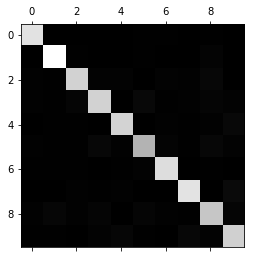

In [190]:
plt.matshow(conf_mx,cmap=plt.cm.gray)

In [191]:
row_sums = conf_mx.sum(axis=1, keepdims=True)
norm_conf_mx = conf_mx / row_sums


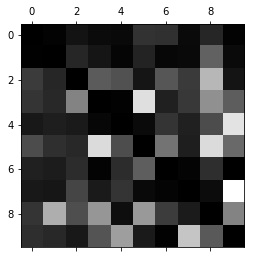

In [192]:
np.fill_diagonal(norm_conf_mx,0)
plt.matshow(norm_conf_mx,cmap=plt.cm.gray)
plt.show()

In [193]:
cl_a,cl_b = 3,5
X_aa = X_train[(y_train==cl_a) & (y_train_pred==cl_a)]
X_ab = X_train[(y_train==cl_a) & (y_train_pred==cl_b)]
X_ba = X_train[(y_train==cl_b) & (y_train_pred==cl_a)]
X_bb = X_train[(y_train==cl_b) & (y_train_pred==cl_b)]

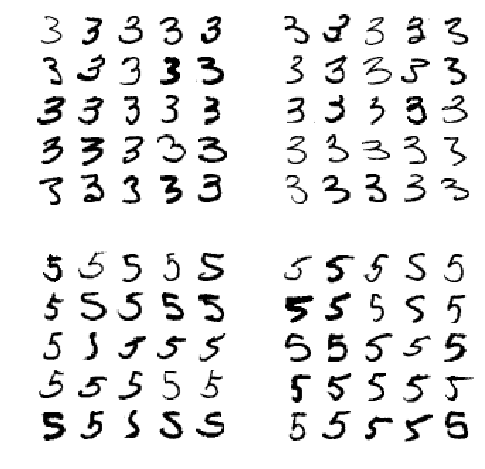

In [194]:
plt.figure(figsize=(8,8))
plt.subplot(221); plot_digits(X_aa[:25], images_per_row=5)
plt.subplot(222); plot_digits(X_ab[:25], images_per_row=5)
plt.subplot(223); plot_digits(X_ba[:25], images_per_row=5)
plt.subplot(224); plot_digits(X_bb[:25], images_per_row=5)
plt.show()

# MultiLabel Classification


In [195]:
from sklearn.neighbors import KNeighborsClassifier
y_train_large = (y_train >= 7)
y_train_odd = (y_train %2 ==1 )
y_multilabel = np.c_[y_train_large, y_train_odd]

knn_clf = KNeighborsClassifier()
knn_clf.fit(X_train,y_multilabel)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

In [196]:
knn_clf.predict([some_digit])

array([[False,  True]], dtype=bool)

In [ ]:
y_train_knn_pred = cross_val_predict(knn_clf,X_train,y_multilabel,cv=3, n_jobs=-1)
f1_score(y_multilabel,y_train_knn_pred, average='macro')
